# Aims

* Implement $\mathrm{SG}_{hmax}$: Shoot & Go heuristic (also known as *Iterated Local Search*, *Random-restart hill climbing*, etc)
    * $hmax \in \{ 0, 1, \ldots, \infty \}$ parameter - maximum number of local searches / hill climbs
    * note that $\mathrm{SG}_{0}$ is pure Random Shooting (Random Search)
* Implement and test on the "Air Ship" objective function
* **How does the $FEO$ criterion change based on the $hmax$ parameter**?
* **The same for objective function of your choice**
    * TSP, KP, or any other combinatorial problem
    * Implement some of typical benchmark problems http://www.geatbx.com/docu/fcnindex-01.html (in a discrete version)

## Notes

* Reliability: $REL = m/q$ where $m$ is number of successful runs and $q$ is total number of runs, $REL \in [0, 1]$
* Mean Number of objective function Evaluations: $MNE = \frac{1}{m} \sum_{i=1}^m neval_i$
* Feoktistov criterion: $FEO = MNE/REL$


----------

### Set up IPython notebook environment first...

In [1]:
# Import path to source directory (bit of a hack in IPython)
import sys
pwd = %pwd
sys.path.append('\\'.join(pwd.split('\\')[:-1])+'\\src')

# And ensure modules are reloaded on any change (useful when developing code on the fly, etc)
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')

### Import our (new) modules from ``src`` folder

In [2]:
from heur import ShootAndGo
from objfun import AirShip

# Demo runs

In [3]:
import numpy as np

### $\mathrm{SG}_{\infty}$

In [4]:
heur = ShootAndGo(AirShip(-100, 0, 800), maxeval=100, hmax=np.inf)
print(heur.search())

{'neval': 74, 'best_x': 50, 'best_y': -100.0}


### $\mathrm{SG}_{10}$

In [5]:
heur = ShootAndGo(AirShip(-100, 0, 800), maxeval=100, hmax=10)
print(heur.search())

{'neval': inf, 'best_x': 24, 'best_y': -48.0}


### $\mathrm{SG}_{0}$

In [6]:
heur = ShootAndGo(AirShip(-100, 0, 800), maxeval=100, hmax=0)
print(heur.search())

{'neval': 55, 'best_x': 50, 'best_y': -100.0}


# What number of runs $M$ to choose?

In [7]:
import pandas as pd

In [8]:
def experiment(M):
    res = []
    for i in range(M):
        heur = ShootAndGo(AirShip(-100, 0, 800), maxeval=100, hmax=0)
        res.append(heur.search())
    return pd.DataFrame(res)

In [9]:
rels = []
for m in [30, 50, 100, 200, 300, 500, 1000, 10000]:
    heur_res = experiment(m)
    rels.append({'M': m, 'rel': sum(heur_res['neval']<np.inf)/heur_res.shape[0]})

df_rels = pd.DataFrame(rels)

In [10]:
df_rels

,M,rel
0,30,0.166667
1,50,0.160000
2,100,0.100000
3,200,0.135000
4,300,0.120000
5,500,0.140000
6,1000,0.124000
7,10000,0.116000


In [11]:
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
import seaborn

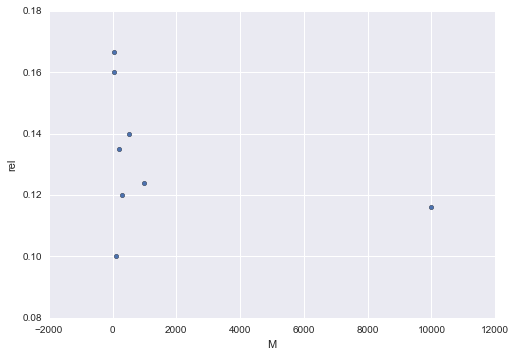

In [12]:
df_rels.plot(x='M', y='rel', kind='scatter')

# ``hmax`` analysis

In [13]:
def experiment_hmax(hmax):
    res = []
    for i in range(10000):
        heur = ShootAndGo(AirShip(-100, 0, 800), maxeval=100, hmax=hmax)
        res.append(heur.search())
    return pd.DataFrame(res)

In [14]:
def stat_feo(res):
    mne = np.mean(res[res['neval']<np.inf]['neval'])
    rel = sum(res['neval']<np.inf)/res.shape[0]
    return {
        'mne': mne,
        'rel': rel,
        'feo': mne/rel
    }

In [15]:
feos = []
for hmax in np.concatenate((np.arange(0, 10+1), [np.inf])):
    heur_res = experiment_hmax(hmax)
    stat = stat_feo(heur_res)
    feos.append({
            'hmax': hmax, 
            'mne': stat['mne'],
            'rel': stat['rel'],
            'feo': stat['feo']
        })
df_feos = pd.DataFrame(feos)

In [16]:
df_feos

,feo,hmax,mne,rel
0,425.329426,0.000000,48.274890,0.1135
1,434.344248,1.000000,50.297064,0.1158
2,427.977839,2.000000,48.789474,0.1140
3,398.920832,3.000000,49.944888,0.1252
4,410.462259,4.000000,48.968148,0.1193
5,392.067444,5.000000,50.145426,0.1279
6,373.296611,6.000000,49.424471,0.1324
7,370.563384,7.000000,49.396099,0.1333
8,383.106384,8.000000,48.731132,0.1272
9,382.418242,9.000000,50.632175,0.1324


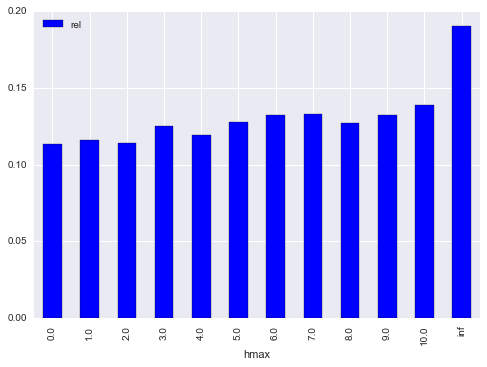

In [18]:
df_feos.plot(x='hmax', y='rel', kind='bar')

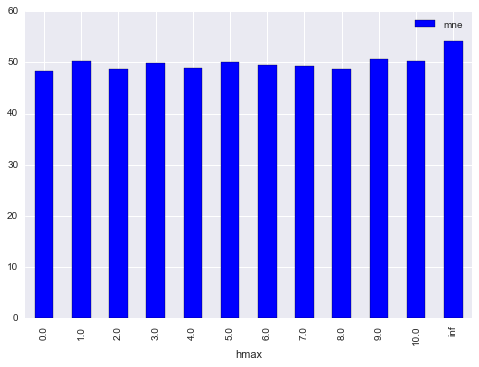

In [19]:
df_feos.plot(x='hmax', y='mne', kind='bar')

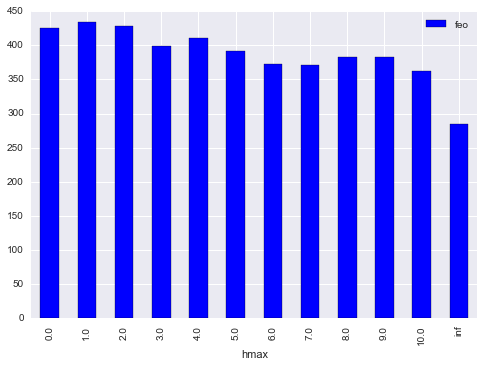

In [17]:
df_feos.plot(x='hmax', y='feo', kind='bar')